In [ ]:
#Libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Library used for Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import copy

#Library for Label Encoding
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from collections import Counter
from scipy import spatial
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### **Reading Data**

In [ ]:
#Reading the data as a dataframe
data_1 = pd.read_csv('roo_data.csv')
data_1

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,yes,yes,yes,shell programming,cloud computing,no,yes,excellent,excellent,cloud computing,system developer,higherstudies,Web Services,no,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,yes,no,yes,machine learning,database security,no,no,poor,medium,networks,Business process analyst,job,SAaS services,yes,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,yes,no,yes,app development,web technologies,no,yes,poor,excellent,hacking,developer,higherstudies,Sales and Marketing,yes,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,no,yes,no,python,data science,yes,no,medium,excellent,networks,testing,higherstudies,Testing and Maintainance Services,no,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,no,no,no,app development,cloud computing,no,no,poor,excellent,Computer Architecture,testing,higherstudies,product development,no,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,2,6,1,8,yes,no,no,app development,cloud computing,yes,no,poor,excellent,Software Engineering,system developer,job,Testing and Maintainance Services,no,yes,Journals,Work,yes,stubborn,Management,salary,smart worker,yes,no,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,8,0,9,8,yes,no,no,full stack,game development,no,yes,medium,excellent,Management,Business process analyst,higherstudies,Product based,yes,yes,Cookbooks,salary,no,stubborn,Management,salary,hard worker,no,yes,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,3,6,2,3,yes,yes,yes,information security,database security,yes,yes,medium,excellent,networks,cloud computing,higherstudies,SAaS services,yes,yes,Drama,Work,yes,gentle,Technical,work,hard worker,no,yes,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,1,4,9,5,no,no,no,full stack,cloud computing,no,yes,poor,poor,IOT,testing,job,Cloud Services,yes,no,Travel,Work,no,gentle,Management,work,smart worker,yes,no,Software Quality Assurance (QA) / Testing


### **Information about Data**

In [ ]:
#Storing all columns
all_columns = list(data_1.columns)
print("Columns: ", all_columns)

Columns:  ['Acedamic percentage in Operating Systems', 'percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Computer Networks', 'Percentage in Electronics Subjects', 'Percentage in Computer Architecture', 'Percentage in Mathematics', 'Percentage in Communication skills', 'Hours working per day', 'Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'can work long time before system?', 'self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'talenttests taken?', 'olympiads', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Job/Higher Studies?', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'interested in games', 'Interested Type of Books', 'Salary Range Expected', 'In a Realtionship?', 'Gentle or Tuff behaviour?', 'Management or Technical', 'Salary/work', 'hard/smart worke

In [ ]:
#Printing the information of the data
#If the type of the columns is appropriate or not
print(data_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

In [ ]:
#Printing the unique values in each column
for i in range(14,39):
  print("Column Name: ",all_columns[i])
  print("Number of Unique Values: ",len(np.unique(data_1.iloc[:,i])))
  print(np.unique(data_1.iloc[:,i]))
  print()

Column Name:  can work long time before system?
Number of Unique Values:  2
['no' 'yes']

Column Name:  self-learning capability?
Number of Unique Values:  2
['no' 'yes']

Column Name:  Extra-courses did
Number of Unique Values:  2
['no' 'yes']

Column Name:  certifications
Number of Unique Values:  9
['app development' 'distro making' 'full stack' 'hadoop'
 'information security' 'machine learning' 'python' 'r programming'
 'shell programming']

Column Name:  workshops
Number of Unique Values:  8
['cloud computing' 'data science' 'database security' 'game development'
 'hacking' 'system designing' 'testing' 'web technologies']

Column Name:  talenttests taken?
Number of Unique Values:  2
['no' 'yes']

Column Name:  olympiads
Number of Unique Values:  2
['no' 'yes']

Column Name:  reading and writing skills
Number of Unique Values:  3
['excellent' 'medium' 'poor']

Column Name:  memory capability score
Number of Unique Values:  3
['excellent' 'medium' 'poor']

Column Name:  Interested 

## **Preprocessing of Data**

**Handling if any missing values**

In [ ]:
#Checking if any cell in the data is empty or not
print(data_1.isnull().sum())
print()
print("Any Empty Cell : ", data_1.isnull().all())

Acedamic percentage in Operating Systems    0
percentage in Algorithms                    0
Percentage in Programming Concepts          0
Percentage in Software Engineering          0
Percentage in Computer Networks             0
Percentage in Electronics Subjects          0
Percentage in Computer Architecture         0
Percentage in Mathematics                   0
Percentage in Communication skills          0
Hours working per day                       0
Logical quotient rating                     0
hackathons                                  0
coding skills rating                        0
public speaking points                      0
can work long time before system?           0
self-learning capability?                   0
Extra-courses did                           0
certifications                              0
workshops                                   0
talenttests taken?                          0
olympiads                                   0
reading and writing skills        

In [ ]:
#Checking if the percentage values lies between 0 to 100
columns = []
#Checking first 9 columns since they are of percentage
for col in range(0,9):
  low = min(data_1.iloc[:,col])
  high = max(data_1.iloc[:,col])

  if low < 0 or high > 100:
    columns.append(col)

if len(columns) == 0:
  print("All values are in range")

All values are in range


**Label Encoding the Categorical/Non-Numeric Values**

In [ ]:
#Label Encoding the rest of the columns
for col_value in range(14,38):
  #Creating an instance of LabelEncoder
  labelencoder = LabelEncoder()
  #Assigning numerical values and storing it in the columns
  column = all_columns[col_value]
  data_1[column] = labelencoder.fit_transform(data_1[column])

data_1

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,1,1,1,8,0,0,1,0,0,4,4,0,8,0,0,21,1,0,1,0,0,0,1,0,Database Developer
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,1,0,1,5,2,0,0,2,1,7,0,1,4,1,1,5,1,1,0,1,0,0,0,1,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,1,0,1,0,7,0,1,2,0,6,2,0,5,1,1,29,0,0,1,0,1,0,0,1,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,0,1,0,6,1,1,0,1,0,7,5,0,7,0,0,23,0,1,0,0,1,1,1,1,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,0,0,0,0,0,0,0,2,0,0,5,0,9,0,1,7,1,0,1,0,1,0,1,1,Business Systems Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69,4,2,6,1,8,1,0,0,0,0,1,0,2,0,3,4,1,7,0,1,17,0,1,1,0,0,1,1,0,Technical Engineer
19996,80,69,83,87,82,66,66,92,67,7,8,0,9,8,1,0,0,2,3,0,1,1,0,2,0,0,3,1,1,7,1,0,1,0,0,0,0,1,E-Commerce Analyst
19997,83,70,80,87,64,85,69,94,88,7,3,6,2,3,1,1,1,4,2,1,1,1,0,7,1,0,4,1,1,10,0,1,0,1,1,0,0,1,Business Intelligence Analyst
19998,68,87,91,88,66,74,61,87,61,5,1,4,9,5,0,0,0,2,0,0,1,2,2,1,5,1,1,1,0,29,0,0,0,0,1,1,1,0,Software Quality Assurance (QA) / Testing


In [ ]:
#Columns 14 to 38 data after label encoding 
data_b = np.array(data_1.iloc[:,14:38])
data_b

array([[1, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 1, 0]])

**Feature Scaling the Numeric Values**

In [ ]:
#Normalizing the data
data_a = data_1.iloc[:,0:14]
normalized_data = Normalizer().fit_transform(data_a)
normalized_data

array([[0.28508989, 0.26029947, 0.32227553, ..., 0.        , 0.01652695,
        0.0330539 ],
       [0.34997994, 0.27818918, 0.32754533, ..., 0.00448692, 0.00897384,
        0.01346077],
       [0.29501244, 0.35733901, 0.37811453, ..., 0.01662042, 0.0041551 ,
        0.01246531],
       ...,
       [0.3430836 , 0.28934762, 0.33068299, ..., 0.02480122, 0.00826707,
        0.01240061],
       [0.29479246, 0.37716094, 0.39450167, ..., 0.01734073, 0.03901665,
        0.02167592],
       [0.31140896, 0.32847247, 0.31567484, ..., 0.00426588, 0.02986113,
        0.02559526]])

### **Input Features**

In [ ]:
#Input data X Features
X = np.append(normalized_data, data_b, axis = 1)
print("Shape of X - Input: ", X.shape)
print()
X

Shape of X - Input:  (20000, 38)



array([[0.28508989, 0.26029947, 0.32227553, ..., 0.        , 1.        ,
        0.        ],
       [0.34997994, 0.27818918, 0.32754533, ..., 0.        , 0.        ,
        1.        ],
       [0.29501244, 0.35733901, 0.37811453, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.3430836 , 0.28934762, 0.33068299, ..., 0.        , 0.        ,
        1.        ],
       [0.29479246, 0.37716094, 0.39450167, ..., 1.        , 1.        ,
        0.        ],
       [0.31140896, 0.32847247, 0.31567484, ..., 0.        , 1.        ,
        0.        ]])

### **Output Labels Clubbing**

**Try1 - Manually Combining the labels**

In [ ]:
print('Initial Count of all the labels\n')
Counter(data_1['Suggested Job Role'])

Initial Count of all the labels



Counter({'Applications Developer': 551,
         'Business Intelligence Analyst': 540,
         'Business Systems Analyst': 582,
         'CRM Business Analyst': 584,
         'CRM Technical Developer': 567,
         'Data Architect': 564,
         'Database Administrator': 593,
         'Database Developer': 581,
         'Database Manager': 570,
         'Design & UX': 588,
         'E-Commerce Analyst': 546,
         'Information Security Analyst': 543,
         'Information Technology Auditor': 558,
         'Information Technology Manager': 591,
         'Mobile Applications Developer': 538,
         'Network Engineer': 621,
         'Network Security Administrator': 1112,
         'Network Security Engineer': 630,
         'Portal Administrator': 593,
         'Programmer Analyst': 529,
         'Project Manager': 602,
         'Quality Assurance Associate': 565,
         'Software Developer': 587,
         'Software Engineer': 590,
         'Software Quality Assurance (QA) / Tes

In [ ]:
#Creating the output columns to 5 to 7 classes
data_y = copy.deepcopy(data_1)
#Converting 'Business Intelligence Analyst', 'Business Systems Analyst','CRM Business Analyst', 'E-Commerce Analyst' 'Information Security Analyst', 'Systems Analyst', 'Programmer Analyst'
data_y['Suggested Job Role'].replace({'Business Intelligence Analyst':'Analyst','Business Systems Analyst':'Analyst','CRM Business Analyst':'Analyst', 'E-Commerce Analyst':'Analyst', 'Information Security Analyst':'Analyst', 'Systems Analyst':'Analyst', 'Programmer Analyst':'Analyst' }, inplace=True)
#Converting 'Applications Developer','Database Developer','Mobile Applications Developer','Web Developer', 'Software Developer'  to 'Developer;
data_y['Suggested Job Role'].replace({'Applications Developer':'Developer','Database Developer':'Developer','Mobile Applications Developer':'Developer','Web Developer':'Developer','Software Developer':'Developer'}, inplace = True)
#Converting 'Quality Assurance Associate','Software Quality Assurance (QA) / Testing' to 'Quality Assurance'
data_y['Suggested Job Role'].replace({'Quality Assurance Associate':'Quality Assurance','Software Quality Assurance (QA) / Testing':'Quality Assurance'}, inplace=True)
#Converting 'Network Engineer', 'Network Security Administrator','Network Security Engineer', 'Portal Administrator','Systems Security Administrator' to 'Network Security'
data_y['Suggested Job Role'].replace({'Network Engineer':'Network Security', 'Network Security Administrator':'Network Security', 'Network Security Engineer':'Network Security','Portal Administrator':'Network Security', 'Systems Security Administrator':'Network Security'}, inplace=True)
#Converting 'UX Designer','Design & UX' 'Developer' to 'UX Designer'
data_y['Suggested Job Role'].replace({'UX Designer':'UX Designer','Design & UX':'UX Designer'}, inplace=True)
#Converting 'CRM Technical Developer', 'Technical Engineer','Technical Services/Help Desk/Tech Support', 'Technical Support'
data_y['Suggested Job Role'].replace({'CRM Technical Developer':'Technical Support', 'Technical Engineer':'Technical Support','Technical Services/Help Desk/Tech Support':'Technical Support', 'Technical Support':'Technical Support'}, inplace=True)
#Converting 'Data Architect' 'Database Administrator' 'Database Manager' to 'Database Engineer
data_y['Suggested Job Role'].replace({'Data Architect':'Database Engineer', 'Database Administrator':'Database Engineer', 'Database Manager':'Database Engineer'}, inplace=True)
#Converting 'Information Technology Auditor', 'Information Technology Manager', 'Software Engineer', 'Software Systems Engineer','Solutions Architect' to Software Engineer'
data_y['Suggested Job Role'].replace({'Information Technology Auditor':'Software Engineer', 'Information Technology Manager':'Software Engineer','Software Engineer':'Software Engineer', 'Software Systems Engineer':'Software Engineer','Solutions Architect':'Software Engineer'}, inplace=True)
#Converting 'Developer', 'UX Designer' to 'Developer/UX Designer'
data_y['Suggested Job Role'].replace({'Developer':'Developer/UX Designer',  'UX Designer':'Developer/UX Designer'}, inplace=True)
#Converting 'Software Engineer' , 'Quality Assurance' to 'Software Engineer/Quality Assurance'
data_y['Suggested Job Role'].replace({'Software Engineer':'Software Engineer/Quality Assurance',  'Quality Assurance':'Software Engineer/Quality Assurance'}, inplace=True)
#Converting 'Technical Support' , 'Database Engineer' to 'Technical Support/Database Engineer'
data_y['Suggested Job Role'].replace({'Technical Support':'Technical Support/Database Engineer',  'Database Engineer':'Technical Support/Database Engineer'}, inplace=True)
#Converting 'Project Manager' , 'Network Security' to 'Network Security/Project Manager'
data_y['Suggested Job Role'].replace({'Project Manager':'Network Security/Project Manager',  'Network Security':'Network Security/Project Manager'}, inplace=True)

In [ ]:
print('Final Count of all the labels after combining the classes')
Counter(data_y['Suggested Job Role'])

Final Count of all the labels after combining the classes


Counter({'Analyst': 3874,
         'Developer/UX Designer': 4004,
         'Network Security/Project Manager': 4120,
         'Software Engineer/Quality Assurance': 4028,
         'Technical Support/Database Engineer': 3974})

In [ ]:
print('Total Number of Classes: {}'.format(len(np.unique(data_y['Suggested Job Role']))))

Total Number of Classes: 5


In [ ]:
#Label Encoding the Output
labelencoder = LabelEncoder()
#Assigning numerical values and storing it in the output
data_y['Suggested Job Role'] = labelencoder.fit_transform(data_y['Suggested Job Role'])
y1 = data_y['Suggested Job Role']
y1 = np.array(y1)
y1

array([1, 2, 2, ..., 0, 3, 1])

### **HeatMap**

In [ ]:
#Creating HeatMap which symbolises the correlation between the labels and rest of columns
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(data_1, cmap ='RdYlGn', linewidths = 0.30, annot = True)

In [ ]:
X.shape

(20000, 38)

**Feature Selection**

Acedamic percentage in Operating Systems    0.000466
percentage in Algorithms                    0.000000
Percentage in Programming Concepts          0.000000
Percentage in Software Engineering          0.000000
Percentage in Computer Networks             0.001717
Percentage in Electronics Subjects          0.000000
Percentage in Computer Architecture         0.006016
Percentage in Mathematics                   0.004877
Percentage in Communication skills          0.000000
Hours working per day                       0.008149
Logical quotient rating                     0.000000
hackathons                                  0.000000
coding skills rating                        0.000000
public speaking points                      0.000000
can work long time before system?           0.005079
self-learning capability?                   0.000000
Extra-courses did                           0.000000
certifications                              0.000000
workshops                                   0.

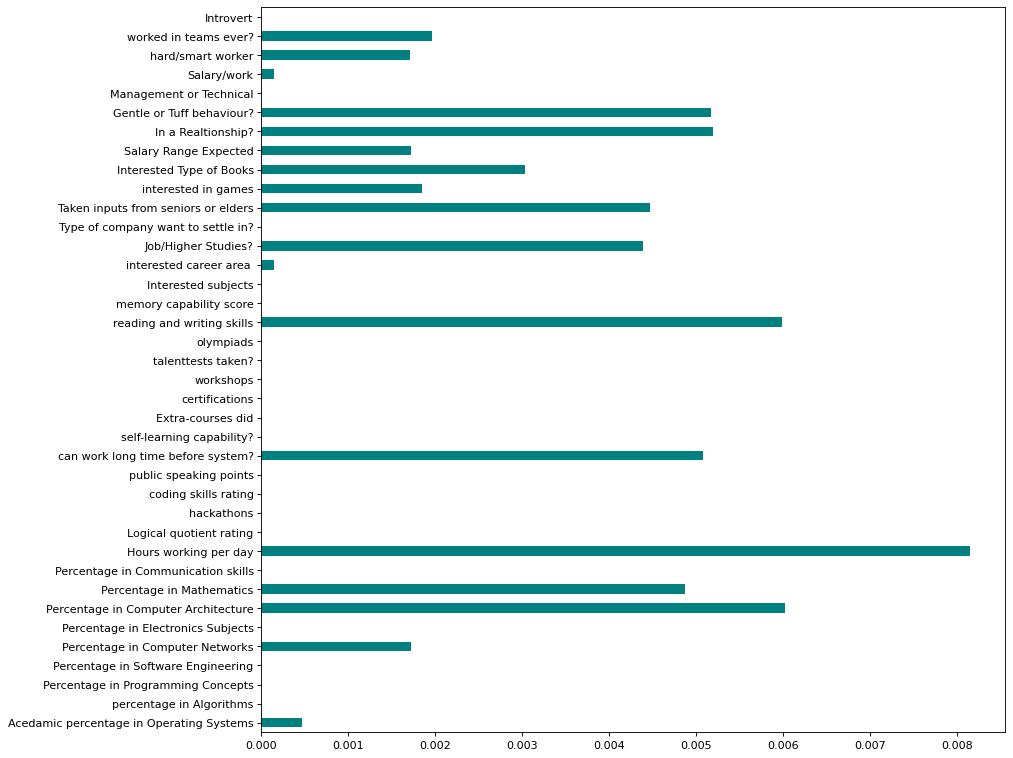

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X,y1)
feat_importances = pd.Series(importances, data_1.columns[0:len(data_1.columns)-2])
print(feat_importances)
figure(figsize=(12, 12), dpi=80)
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

In [ ]:
#Taking top 10 features
top_features = ['Percentage in Computer Networks','Percentage in Mathematics','Percentage in Computer Architecture','can work long time before system?',
'Job/Higher Studies?','In a Realtionship?','Taken inputs from seniors or elders','Gentle or Tuff behaviour?','Interested Type of Books','Hours working per day']

#Extracting Data

data_feat = []
for feat in top_features:
  column_index = data_1.columns.get_loc(feat)
  print(column_index)
  value = X[:,column_index]
  print(value.shape)
  data_feat.append(value)
data_feat = np.array(data_feat)

4
(20000,)
7
(20000,)
6
(20000,)
14
(20000,)
25
(20000,)
31
(20000,)
27
(20000,)
32
(20000,)
29
(20000,)
9
(20000,)


In [ ]:
data_feat

array([[3.88383332e-01, 3.18571483e-01, 2.53461388e-01, ...,
        2.64546392e-01, 2.86122089e-01, 2.98611334e-01],
       [3.47065957e-01, 3.76901473e-01, 2.99167540e-01, ...,
        3.88552513e-01, 3.77160935e-01, 3.11408963e-01],
       [3.59461169e-01, 3.27545327e-01, 2.99167540e-01, ...,
        2.85214079e-01, 2.64446173e-01, 3.92460611e-01],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.10000000e+01, 5.00000000e+00, 2.90000000e+01, ...,
        1.00000000e+01, 2.90000000e+01, 6.00000000e+00],
       [3.71856382e-02, 5.38430675e-02, 4.57061520e-02, ...,
        2.89347616e-02, 2.16759158e-02, 2.98611334e-02]])

**Try2 - Combining Features using Cosine Similarity between labels**

In [ ]:
#Finding the average of all the data between the columns

#Unique Labels 
unique_labels = np.unique(data_1['Suggested Job Role'])

#Storing the average of all columns for each label
avg_values = []

#For each class label
for label in unique_labels:
  averages = [] 
  data = data_1.loc[data_1['Suggested Job Role'] == label] #Extracting data of Suggested label
  for column in range(0,38):
    column_data = list(data[all_columns[column]])
    averages.append(sum(column_data)/len(column_data)) #Appending averages

  avg_values.append(averages)
  print("Label: ",label)
  print(averages)
  print()


Label:  Applications Developer
[76.52450090744102, 77.0617059891107, 76.93466424682396, 76.19600725952813, 76.4010889292196, 77.65880217785843, 76.38656987295826, 77.20145190562613, 76.9382940108893, 8.107078039927405, 4.778584392014519, 2.882032667876588, 4.947368421052632, 4.907441016333938, 0.49727767695099817, 0.49364791288566245, 0.49183303085299457, 4.192377495462795, 3.442831215970962, 0.5444646098003629, 0.5117967332123412, 0.9528130671506352, 1.0235934664246824, 4.5535390199637025, 2.4500907441016335, 0.47186932849364793, 4.511796733212341, 0.47005444646098005, 0.4863883847549909, 15.343012704174228, 0.49909255898366606, 0.5045372050816697, 0.49909255898366606, 0.5335753176043557, 0.4827586206896552, 0.5027223230490018, 0.49727767695099817, 0.4882032667876588]

Label:  Business Intelligence Analyst
[76.74259259259259, 78.05555555555556, 76.6462962962963, 77.28703703703704, 76.5962962962963, 76.7611111111111, 76.69074074074074, 76.63333333333334, 76.52777777777777, 8.1203703703

In [ ]:
#Finding Cosine Similarities
cosine_similarities = []

#Iterating over all jobs
for label in range(len(unique_labels)):
  avg = avg_values[label]
  cosine = [] #Appending the cosine values
  for label1 in range(len(unique_labels)):
    avg1 = avg_values[label1]
    distance = 1 - spatial.distance.cosine(avg,avg1) #Calculating the cosine values
    cosine.append(distance)
  
  cosine_similarities.append(cosine)
  #Printing the top 10 Cosine Similar Values and then combining the classes accordingly
  print("Class: " ,unique_labels[label])
  cosine = np.array(cosine)
  sort_values = (-cosine).argsort()[:10]
  for value in sort_values:
    print(unique_labels[value])
  print()
  print()


Class:  Applications Developer
Applications Developer
Database Manager
Software Engineer
Information Technology Auditor
Project Manager
Information Technology Manager
Software Developer
Network Security Administrator
Systems Analyst
UX Designer


Class:  Business Intelligence Analyst
Business Intelligence Analyst
Technical Services/Help Desk/Tech Support
Business Systems Analyst
Information Technology Auditor
Database Manager
Technical Support
E-Commerce Analyst
Design & UX
Software Developer
Technical Engineer


Class:  Business Systems Analyst
Business Systems Analyst
Database Manager
E-Commerce Analyst
Design & UX
UX Designer
Technical Services/Help Desk/Tech Support
Information Technology Auditor
Network Engineer
Database Developer
Web Developer


Class:  CRM Business Analyst
CRM Business Analyst
Database Manager
Systems Analyst
Quality Assurance Associate
Information Technology Manager
Network Security Administrator
Database Developer
UX Designer
Portal Administrator
Software Syst

In [ ]:
#Creating the output columns to 5 to 7 classes
data_y1 = copy.deepcopy(data_1)
#Converting 'Applications Developer','Database Manager','Software Engineer','Information Technology Auditor','Project Manager','Information Technology Manager'
data_y1['Suggested Job Role'].replace({'Applications Developer':'Software Field','Database Manager':'Software Field','Software Engineer':'Software Field','Information Technology Auditor':'Software Field','Project Manager':'Software Field','Information Technology Manager':'Software Field' }, inplace=True)
#Converting 'Business Intelligence Analyst','Technical Services/Help Desk/Tech Support','Business Systems Analyst','Technical Support','E-Commerce Analyst','Design & UX' to 'Analyst;
data_y1['Suggested Job Role'].replace({'Business Intelligence Analyst':'Analyst','Technical Services/Help Desk/Tech Support':'Analyst','Business Systems Analyst':'Analyst', 'Technical Support':'Analyst', 'E-Commerce Analyst':'Analyst','Design & UX':'Analyst'}, inplace = True)
#Converting 'CRM Business Analyst','Systems Analyst','Quality Assurance Associate','Network Security Administrator','Database Developer','UX Designer', to 'Administrator'
data_y1['Suggested Job Role'].replace({'CRM Business Analyst':'Administrator','Systems Analyst':'Administrator','Quality Assurance Associate':'Administrator','Network Security Administrator':'Administrator','Database Developer':'Administrator','UX Designer':'Administrator'}, inplace=True)
#Converting 'CRM Technical Developer','Data Architect','Software Quality Assurance (QA) / Testing','Portal Administrator','Database Administrator' to 'QA'
data_y1['Suggested Job Role'].replace({'CRM Technical Developer':'QA','Data Architect':'QA','Software Quality Assurance (QA) / Testing':'QA','Portal Administrator':'QA','Database Administrator':'QA'}, inplace=True)
#Converting 'Information Security Analyst','Software Systems Engineer','Network Security Engineer','Web Developer','Network Engineer'to 'Engineer'
data_y1['Suggested Job Role'].replace({'Information Security Analyst':'Engineer','Software Systems Engineer':'Engineer','Network Security Engineer':'Engineer','Web Developer':'Engineer','Network Engineer':'Engineer'}, inplace=True)
#Converting 'Systems Security Administrator', 'Mobile Applications Developer','Programmer Analyst','Software Developer','Solutions Architect', 'Technical Engineer' to 'Developer'
data_y1['Suggested Job Role'].replace({'Systems Security Administrator':'Developer', 'Mobile Applications Developer':'Developer','Programmer Analyst':'Developer','Software Developer':'Developer','Solutions Architect':'Developer', 'Technical Engineer':'Developer'}, inplace=True)


In [ ]:
print('Final Count of all the labels after combining the classes')
Counter(data_y1['Suggested Job Role'])

Final Count of all the labels after combining the classes


Counter({'Administrator': 3981,
         'Analyst': 3379,
         'Developer': 3351,
         'Engineer': 2939,
         'QA': 2888,
         'Software Field': 3462})

In [ ]:
print('Total Number of Classes: {}'.format(len(np.unique(data_y1['Suggested Job Role']))))

Total Number of Classes: 6


In [ ]:
#Label Encoding the Output
labelencoder = LabelEncoder()
#Assigning numerical values and storing it in the output
data_y1['Suggested Job Role'] = labelencoder.fit_transform(data_y1['Suggested Job Role'])
y2 = data_y1['Suggested Job Role']
y2 = np.array(y2)
y2

array([0, 4, 4, ..., 1, 4, 5])

### **Model Evaluation**

**Splitting train and test data**

**Varying Test Sizes - Technique 1**

In [ ]:
test_size = [0.1,0.2,0.3,0.4,0.5]
accuracy = []
for size in test_size:
  print("Test Size ", size)
  train_x, test_x, train_y, test_y = train_test_split(X, y1, test_size=size,random_state=42)
  model = MLPClassifier(max_iter = 100, hidden_layer_sizes=(50,50,25))
  model.fit(train_x,train_y)
  y_pred = model.predict(test_x)
  print('Accuracy score calculated on Test Data : ',accuracy_score(y_pred,test_y))
  print()
  print('Confusion Matrix : ',confusion_matrix(test_y, y_pred) )
  print()
  matrix_form = confusion_matrix(test_y, y_pred)
  print('Classwise accuracy : ',matrix_form.diagonal()/matrix_form.sum(axis=1) )
  print()
  print('Classification report : ')
  labels = np.unique(data_y['Suggested Job Role'])
  print(classification_report(test_y, y_pred))
  accuracy.append(accuracy_score(y_pred,test_y))

Test Size  0.1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.3425

Confusion matrix :  [[125  53  61  56  87]
 [ 53 134  65  64  84]
 [ 48  75 139  64  69]
 [ 51  72  64 124  94]
 [ 62  64  68  61 163]]

Classwise accuracy :  [0.32722513 0.335      0.35189873 0.30617284 0.38995215]

Classification report : 
              precision    recall  f1-score   support

           0       0.37      0.33      0.35       382
           1       0.34      0.34      0.34       400
           2       0.35      0.35      0.35       395
           3       0.34      0.31      0.32       405
           4       0.33      0.39      0.36       418

    accuracy                           0.34      2000
   macro avg       0.34      0.34      0.34      2000
weighted avg       0.34      0.34      0.34      2000

Test Size  0.2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.33275

Confusion matrix :  [[206 134 149 125 131]
 [116 258 147 128 131]
 [ 98 148 283 154 124]
 [114 153 151 272 161]
 [ 98 136 126 145 312]]

Classwise accuracy :  [0.27651007 0.33076923 0.35068154 0.31962397 0.38188494]

Classification report : 
              precision    recall  f1-score   support

           0       0.33      0.28      0.30       745
           1       0.31      0.33      0.32       780
           2       0.33      0.35      0.34       807
           3       0.33      0.32      0.32       851
           4       0.36      0.38      0.37       817

    accuracy                           0.33      4000
   macro avg       0.33      0.33      0.33      4000
weighted avg       0.33      0.33      0.33      4000

Test Size  0.3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.29883333333333334

Confusion matrix :  [[304 238 170 217 183]
 [157 394 200 237 189]
 [152 289 276 314 170]
 [151 242 251 407 230]
 [155 221 157 284 412]]

Classwise accuracy :  [0.27338129 0.33474936 0.22980849 0.31772053 0.3352319 ]

Classification report : 
              precision    recall  f1-score   support

           0       0.33      0.27      0.30      1112
           1       0.28      0.33      0.31      1177
           2       0.26      0.23      0.24      1201
           3       0.28      0.32      0.30      1281
           4       0.35      0.34      0.34      1229

    accuracy                           0.30      6000
   macro avg       0.30      0.30      0.30      6000
weighted avg       0.30      0.30      0.30      6000

Test Size  0.4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.292875

Confusion matrix :  [[428 395 269 164 236]
 [228 626 296 155 242]
 [218 544 456 186 222]
 [208 466 474 303 247]
 [224 417 274 192 530]]

Classwise accuracy :  [0.28686327 0.40465417 0.2804428  0.17844523 0.32376298]

Classification report : 
              precision    recall  f1-score   support

           0       0.33      0.29      0.31      1492
           1       0.26      0.40      0.31      1547
           2       0.26      0.28      0.27      1626
           3       0.30      0.18      0.22      1698
           4       0.36      0.32      0.34      1637

    accuracy                           0.29      8000
   macro avg       0.30      0.29      0.29      8000
weighted avg       0.30      0.29      0.29      8000

Test Size  0.5
Accuracy score calculated on Test Data :  0.2876

Confusion matrix :  [[463 348 546 162 376]
 [257 606 503 171 377]
 [288 374 804 217 385]
 [282 362 736 251 426]
 [275 352 481 206 752]]

Classwise accur

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


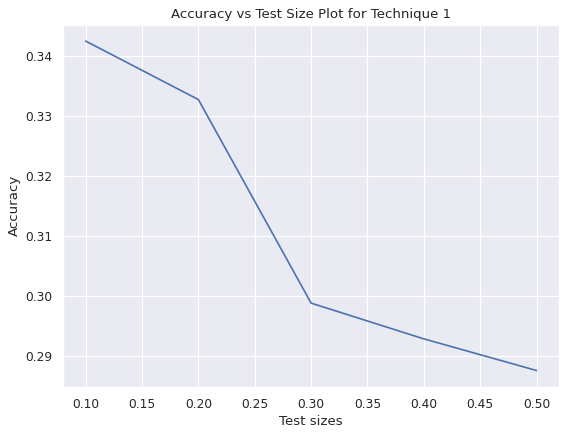

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.plot(test_size, accuracy)
plt.title('Accuracy vs Test Size Plot for Technique 1')
plt.ylabel('Accuracy')
plt.xlabel('Test sizes')
plt.show()

**Varying Test Sizes - Technique 2**

In [ ]:
test_size = [0.1,0.2,0.3,0.4,0.5]
accuracy1 = []
for size in test_size:
  print("Test Size ", size)
  train_x, test_x, train_y, test_y = train_test_split(X, y2, test_size=size,random_state=42)
  model = MLPClassifier(max_iter = 100, hidden_layer_sizes=(50,50,25))
  model.fit(train_x,train_y)
  y_pred = model.predict(test_x)
  print('Accuracy score calculated on Test Data : ',accuracy_score(y_pred,test_y))
  print()
  print('Confusion matrix : ',confusion_matrix(test_y, y_pred) )
  print()
  matrix_form = confusion_matrix(test_y, y_pred)
  print('Classwise accuracy : ',matrix_form.diagonal()/matrix_form.sum(axis=1) )
  print()
  print('Classification report : ')
  labels = np.unique(data_y['Suggested Job Role'])
  print(classification_report(test_y, y_pred))
  accuracy1.append(accuracy_score(y_pred,test_y))

Test Size  0.1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.305

Confusion matrix :  [[140  46  52  56  18  57]
 [ 62 114  53  49  29  43]
 [ 58  66 108  60  25  36]
 [ 38  38  44  91  28  42]
 [ 56  39  38  69  47  54]
 [ 50  43  50  59  32 110]]

Classwise accuracy :  [0.37940379 0.32571429 0.30594901 0.32384342 0.15511551 0.31976744]

Classification report : 
              precision    recall  f1-score   support

           0       0.35      0.38      0.36       369
           1       0.33      0.33      0.33       350
           2       0.31      0.31      0.31       353
           3       0.24      0.32      0.27       281
           4       0.26      0.16      0.20       303
           5       0.32      0.32      0.32       344

    accuracy                           0.30      2000
   macro avg       0.30      0.30      0.30      2000
weighted avg       0.31      0.30      0.30      2000

Test Size  0.2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.298

Confusion matrix :  [[281 118 108  67  94  86]
 [133 218 106  70  82  89]
 [118 129 167  85  82  95]
 [108  83 115 135  77  78]
 [111  81  83  52 172  73]
 [131  92 118  64  80 219]]

Classwise accuracy :  [0.37267905 0.31232092 0.24704142 0.22651007 0.3006993  0.31107955]

Classification report : 
              precision    recall  f1-score   support

           0       0.32      0.37      0.34       754
           1       0.30      0.31      0.31       698
           2       0.24      0.25      0.24       676
           3       0.29      0.23      0.25       596
           4       0.29      0.30      0.30       572
           5       0.34      0.31      0.33       704

    accuracy                           0.30      4000
   macro avg       0.30      0.30      0.29      4000
weighted avg       0.30      0.30      0.30      4000

Test Size  0.3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.2785

Confusion matrix :  [[464 194 162  59  53 210]
 [228 347 177  61  62 169]
 [229 218 259  69  58 179]
 [198 171 138 163  54 158]
 [206 160 106  65  69 244]
 [206 199 156  73  67 369]]

Classwise accuracy :  [0.40630473 0.33237548 0.25592885 0.18480726 0.08117647 0.34485981]

Classification report : 
              precision    recall  f1-score   support

           0       0.30      0.41      0.35      1142
           1       0.27      0.33      0.30      1044
           2       0.26      0.26      0.26      1012
           3       0.33      0.18      0.24       882
           4       0.19      0.08      0.11       850
           5       0.28      0.34      0.31      1070

    accuracy                           0.28      6000
   macro avg       0.27      0.27      0.26      6000
weighted avg       0.27      0.28      0.27      6000

Test Size  0.4


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.256375

Confusion matrix :  [[528 248 299  91 108 250]
 [266 320 380 100  85 211]
 [207 274 459  92  88 247]
 [196 234 304 123  95 215]
 [194 187 241  93 147 280]
 [221 229 269  99 146 474]]

Classwise accuracy :  [0.34645669 0.2349486  0.33577176 0.10539846 0.12872154 0.32962448]

Classification report : 
              precision    recall  f1-score   support

           0       0.33      0.35      0.34      1524
           1       0.21      0.23      0.22      1362
           2       0.24      0.34      0.28      1367
           3       0.21      0.11      0.14      1167
           4       0.22      0.13      0.16      1142
           5       0.28      0.33      0.30      1438

    accuracy                           0.26      8000
   macro avg       0.25      0.25      0.24      8000
weighted avg       0.25      0.26      0.25      8000

Test Size  0.5
Accuracy score calculated on Test Data :  0.2513

Confusion matrix :  [[855 226 201 259  8

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


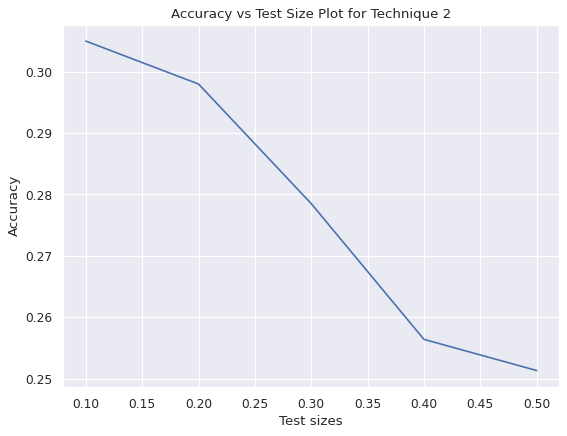

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.plot(test_size, accuracy1)
plt.title('Accuracy vs Test Size Plot for Technique 2')
plt.ylabel('Accuracy')
plt.xlabel('Test sizes')
plt.show()

**Feature Selection**

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data_feat, y1, test_size=0.2,random_state=42)
model = MLPClassifier(max_iter = 100, hidden_layer_sizes=(50,50,25))
model.fit(train_x,train_y)
y_pred = model.predict(test_x)
print('Accuracy score calculated on Test Data : ',accuracy_score(y_pred,test_y))
print()
print('Confusion matrix : ',confusion_matrix(test_y, y_pred) )
print()
matrix_form = confusion_matrix(test_y, y_pred)
print('Classwise accuracy : ',matrix_form.diagonal()/matrix_form.sum(axis=1) )
print()
print('Classification report : ')
labels = np.unique(data_y['Suggested Job Role'])
print(classification_report(test_y, y_pred))

Accuracy score calculated on Test Data :  0.292875

Confusion matrix :  [[506 330 233 183 240]
 [285 564 248 184 266]
 [277 403 427 256 263]
 [307 358 331 320 382]
 [295 359 234 223 526]]

Classwise accuracy :  [0.33914209 0.3645766  0.26260763 0.18845701 0.32131949]

Classification report : 
              precision    recall  f1-score   support

           0       0.30      0.34      0.32      1492
           1       0.28      0.36      0.32      1547
           2       0.29      0.26      0.28      1626
           3       0.27      0.19      0.22      1698
           4       0.31      0.32      0.32      1637

    accuracy                           0.29      8000
   macro avg       0.29      0.30      0.29      8000
weighted avg       0.29      0.29      0.29      8000



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data_feat, y2, test_size=0.3,random_state=42)
model = MLPClassifier(max_iter = 100, hidden_layer_sizes=(50,50,25))
model.fit(train_x,train_y)
y_pred = model.predict(test_x)
print('Accuracy score calculated on Test Data : ',accuracy_score(y_pred,test_y))
print()
print('Confusion matrix : ',confusion_matrix(test_y, y_pred) )
print()
matrix_form = confusion_matrix(test_y, y_pred)
print('Classwise accuracy : ',matrix_form.diagonal()/matrix_form.sum(axis=1) )
print()
print('Classification report : ')
labels = np.unique(data_y['Suggested Job Role'])
print(classification_report(test_y, y_pred))

Accuracy score calculated on Test Data :  0.31216666666666665

Confusion matrix :  [[394 130 230 196 162]
 [256 194 332 208 187]
 [228 138 425 222 188]
 [224 129 272 446 210]
 [219 145 244 207 414]]

Classwise accuracy :  [0.35431655 0.16482583 0.35387177 0.3481655  0.33685924]

Classification report : 
              precision    recall  f1-score   support

           0       0.30      0.35      0.32      1112
           1       0.26      0.16      0.20      1177
           2       0.28      0.35      0.31      1201
           3       0.35      0.35      0.35      1281
           4       0.36      0.34      0.35      1229

    accuracy                           0.31      6000
   macro avg       0.31      0.31      0.31      6000
weighted avg       0.31      0.31      0.31      6000



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


**Varying Hidden Layers and Neurons**

In [ ]:
hidden_layers=[(50),(50,25),(50,50,25),(50,50,25,25)]
accuracy2 = []
for value in hidden_layers:
  train_x, test_x, train_y, test_y = train_test_split(X1, y2, test_size=0.2,random_state=42)
  model = MLPClassifier(max_iter = 100, hidden_layer_sizes=value)
  model.fit(train_x,train_y)
  y_pred = model.predict(test_x)
  print('Accuracy score calculated on Test Data : ',accuracy_score(y_pred,test_y))
  print()
  print('Confusion matrix : ',confusion_matrix(test_y, y_pred) )
  print()
  matrix_form = confusion_matrix(test_y, y_pred)
  print('Classwise accuracy : ',matrix_form.diagonal()/matrix_form.sum(axis=1) )
  print()
  print('Classification report : ')
  labels = np.unique(data_y['Suggested Job Role'])
  print(classification_report(test_y, y_pred))
  accuracy2.append(accuracy_score(y_pred,test_y))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.26475

Confusion matrix :  [[299  74 107  94  40 140]
 [150 133 155  88  35 137]
 [148 108 146 106  35 133]
 [123  60  92 157  46 118]
 [139  56  70  83  60 164]
 [141  71  87  98  43 264]]

Classwise accuracy :  [0.39655172 0.19054441 0.21597633 0.26342282 0.1048951  0.375     ]

Classification report : 
              precision    recall  f1-score   support

           0       0.30      0.40      0.34       754
           1       0.26      0.19      0.22       698
           2       0.22      0.22      0.22       676
           3       0.25      0.26      0.26       596
           4       0.23      0.10      0.14       572
           5       0.28      0.38      0.32       704

    accuracy                           0.26      4000
   macro avg       0.26      0.26      0.25      4000
weighted avg       0.26      0.26      0.25      4000



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.2955

Confusion matrix :  [[273  85 100  95  63 138]
 [132 204  91  77  80 114]
 [135  82 190  91  61 117]
 [104  73  74 165  76 104]
 [ 96  63  81  79  96 157]
 [118  79  90  84  79 254]]

Classwise accuracy :  [0.36206897 0.29226361 0.28106509 0.27684564 0.16783217 0.36079545]

Classification report : 
              precision    recall  f1-score   support

           0       0.32      0.36      0.34       754
           1       0.35      0.29      0.32       698
           2       0.30      0.28      0.29       676
           3       0.28      0.28      0.28       596
           4       0.21      0.17      0.19       572
           5       0.29      0.36      0.32       704

    accuracy                           0.30      4000
   macro avg       0.29      0.29      0.29      4000
weighted avg       0.29      0.30      0.29      4000



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.29075

Confusion matrix :  [[275  89 112  85 106  87]
 [131 200  98  82  98  89]
 [138 103 187  76  92  80]
 [122  78  85 153  74  84]
 [113  70  74  73 170  72]
 [143  93  90  83 117 178]]

Classwise accuracy :  [0.36472149 0.28653295 0.27662722 0.25671141 0.2972028  0.25284091]

Classification report : 
              precision    recall  f1-score   support

           0       0.30      0.36      0.33       754
           1       0.32      0.29      0.30       698
           2       0.29      0.28      0.28       676
           3       0.28      0.26      0.27       596
           4       0.26      0.30      0.28       572
           5       0.30      0.25      0.28       704

    accuracy                           0.29      4000
   macro avg       0.29      0.29      0.29      4000
weighted avg       0.29      0.29      0.29      4000

Accuracy score calculated on Test Data :  0.29025

Confusion matrix :  [[272  86 113  99  93  91]
 [146 18

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


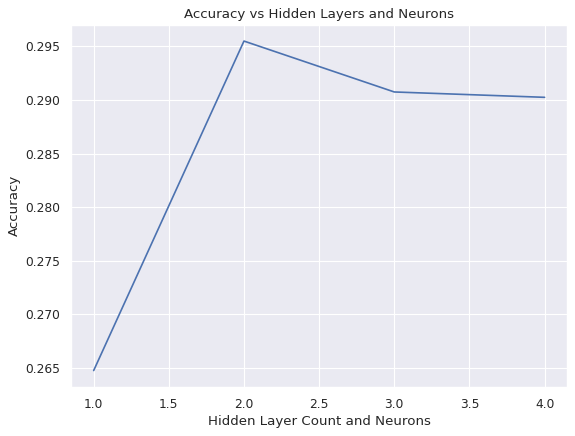

In [ ]:
from matplotlib.pyplot import figure
hidden_layer_count = [1,2,3,4]
figure(figsize=(8, 6), dpi=80)
plt.plot(hidden_layer_count, accuracy2)
plt.title('Accuracy vs Hidden Layers and Neurons')
plt.ylabel('Accuracy')
plt.xlabel('Hidden Layer Count and Neurons')
plt.show()

In [ ]:
hidden_layers=[(50),(50,50),(25,25),(50,25),(50,50,50),(50,50,25),(50,25,25),(50,50,25,25),(50,50,50,25),(50,50,50,50)]
# accuracy2 = []
import pickle
count = 0
for value in hidden_layers:
  train_x, test_x, train_y, test_y = train_test_split(X1, y1, test_size=0.2,random_state=42)
  model = MLPClassifier(max_iter = 100, hidden_layer_sizes=value)
  model.fit(train_x,train_y)
  y_pred = model.predict(test_x)
  print('Accuracy score calculated on Test Data : ',accuracy_score(y_pred,test_y))
  print()
  print('Confusion matrix : ',confusion_matrix(test_y, y_pred) )
  print()
  matrix_form = confusion_matrix(test_y, y_pred)
  print('Classwise accuracy : ',matrix_form.diagonal()/matrix_form.sum(axis=1) )
  print()
  print('Classification report : ')
  labels = np.unique(data_y['Suggested Job Role'])
  print(classification_report(test_y, y_pred))
  accuracy2.append(accuracy_score(y_pred,test_y))
  filename = 'model_hidden'+str(count)+'.sav'
  pickle.dump(model, open(filename, 'wb'))
  count+=1 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.326

Confusion matrix :  [[271 162 122  67 123]
 [118 318 137  61 146]
 [120 207 249  83 148]
 [115 170 180 155 231]
 [114 175 132  85 311]]

Classwise accuracy :  [0.36375839 0.40769231 0.30855019 0.18213866 0.38066095]

Classification report : 
              precision    recall  f1-score   support

           0       0.37      0.36      0.37       745
           1       0.31      0.41      0.35       780
           2       0.30      0.31      0.31       807
           3       0.34      0.18      0.24       851
           4       0.32      0.38      0.35       817

    accuracy                           0.33      4000
   macro avg       0.33      0.33      0.32      4000
weighted avg       0.33      0.33      0.32      4000



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.33375

Confusion matrix :  [[261 120 149  95 120]
 [138 250 134 120 138]
 [129 123 288 127 140]
 [118 132 152 279 170]
 [114 144 158 144 257]]

Classwise accuracy :  [0.35033557 0.32051282 0.35687732 0.32784959 0.31456548]

Classification report : 
              precision    recall  f1-score   support

           0       0.34      0.35      0.35       745
           1       0.33      0.32      0.32       780
           2       0.33      0.36      0.34       807
           3       0.36      0.33      0.35       851
           4       0.31      0.31      0.31       817

    accuracy                           0.33      4000
   macro avg       0.33      0.33      0.33      4000
weighted avg       0.33      0.33      0.33      4000



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.299

Confusion matrix :  [[254 124 166  50 151]
 [140 151 243  78 168]
 [132 102 309  82 182]
 [117  71 199 134 330]
 [114  91 193  71 348]]

Classwise accuracy :  [0.3409396  0.19358974 0.38289963 0.15746181 0.42594859]

Classification report : 
              precision    recall  f1-score   support

           0       0.34      0.34      0.34       745
           1       0.28      0.19      0.23       780
           2       0.28      0.38      0.32       807
           3       0.32      0.16      0.21       851
           4       0.30      0.43      0.35       817

    accuracy                           0.30      4000
   macro avg       0.30      0.30      0.29      4000
weighted avg       0.30      0.30      0.29      4000



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.34725

Confusion matrix :  [[251 152 153  82 107]
 [103 299 143 113 122]
 [115 143 295 126 128]
 [100 145 184 267 155]
 [107 150 140 143 277]]

Classwise accuracy :  [0.33691275 0.38333333 0.36555143 0.31374853 0.33904529]

Classification report : 
              precision    recall  f1-score   support

           0       0.37      0.34      0.35       745
           1       0.34      0.38      0.36       780
           2       0.32      0.37      0.34       807
           3       0.37      0.31      0.34       851
           4       0.35      0.34      0.34       817

    accuracy                           0.35      4000
   macro avg       0.35      0.35      0.35      4000
weighted avg       0.35      0.35      0.35      4000



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.3325

Confusion matrix :  [[232 139 150 112 112]
 [119 257 142 137 125]
 [122 126 287 148 124]
 [118 128 148 296 161]
 [117 138 152 152 258]]

Classwise accuracy :  [0.3114094  0.32948718 0.35563817 0.34782609 0.31578947]

Classification report : 
              precision    recall  f1-score   support

           0       0.33      0.31      0.32       745
           1       0.33      0.33      0.33       780
           2       0.33      0.36      0.34       807
           3       0.35      0.35      0.35       851
           4       0.33      0.32      0.32       817

    accuracy                           0.33      4000
   macro avg       0.33      0.33      0.33      4000
weighted avg       0.33      0.33      0.33      4000



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.325

Confusion matrix :  [[242 139 154 130  80]
 [129 265 138 152  96]
 [137 149 250 170 101]
 [104 139 169 319 120]
 [109 148 160 176 224]]

Classwise accuracy :  [0.32483221 0.33974359 0.30978934 0.37485311 0.27417381]

Classification report : 
              precision    recall  f1-score   support

           0       0.34      0.32      0.33       745
           1       0.32      0.34      0.33       780
           2       0.29      0.31      0.30       807
           3       0.34      0.37      0.35       851
           4       0.36      0.27      0.31       817

    accuracy                           0.33      4000
   macro avg       0.33      0.32      0.32      4000
weighted avg       0.33      0.33      0.32      4000



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy score calculated on Test Data :  0.35175

Confusion matrix :  [[286 122 160  95  82]
 [130 282 148 122  98]
 [139 121 309 132 106]
 [132 118 160 299 142]
 [130 131 182 143 231]]

Classwise accuracy :  [0.38389262 0.36153846 0.38289963 0.35135135 0.28274174]

Classification report : 
              precision    recall  f1-score   support

           0       0.35      0.38      0.37       745
           1       0.36      0.36      0.36       780
           2       0.32      0.38      0.35       807
           3       0.38      0.35      0.36       851
           4       0.35      0.28      0.31       817

    accuracy                           0.35      4000
   macro avg       0.35      0.35      0.35      4000
weighted avg       0.35      0.35      0.35      4000

Accuracy score calculated on Test Data :  0.3325

Confusion matrix :  [[245 162 163 107  68]
 [138 295 145 111  91]
 [144 159 289 125  90]
 [130 146 168 313  94]
 [134 167 170 158 188]]

Classwise accuracy :  [0.328859

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


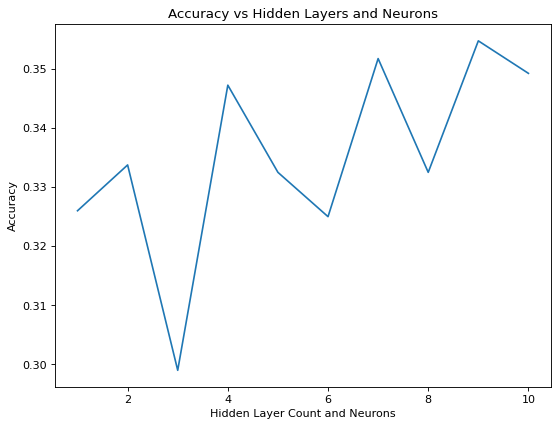

In [ ]:
from matplotlib.pyplot import figure
hidden_layer_count = [1,2,3,4,5,6,7,8,9,10]
figure(figsize=(8, 6), dpi=80)
plt.plot(hidden_layer_count, accuracy2)
plt.title('Accuracy vs Hidden Layers and Neurons')
plt.ylabel('Accuracy')
plt.xlabel('Hidden Layer Count and Neurons')
plt.show()